# Dimensionality Reduction

The project’s objective is to explore and demonstrate the effectiveness of PCA and t-SNE in reducing the dimensionality of complex, multimodal data while preserving essential information and enhancing data visualization. The dataset that will be used here is a record dataset containing detailed information regarding different motor vehicles. The tools and libraries are exlusively Python and it's scikit-learn library.

Below are the python libraries used:

In [1387]:
import json
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA
from numpy import linalg as LA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

Here's a snippet of the dataset in question:

In [1388]:
record_data = pd.read_csv('../eda/cars-data.csv')

record_data.head()

,Unnamed: 0,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,0,18,midsize car,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993
1,1,19,midsize car,22,4.0,2.2,fwd,gas,27,toyota,Camry,m,1993
2,2,16,midsize car,19,6.0,3.0,fwd,gas,22,toyota,Camry,a,1993
3,3,16,midsize car,18,6.0,3.0,fwd,gas,22,toyota,Camry,m,1993
4,4,18,midsize-large station wagon,21,4.0,2.2,fwd,gas,26,toyota,Camry,a,1993


## Some preliminary cleaning

In [1389]:
df = record_data.copy()

In [1390]:
nan_count = record_data.isna().sum()

print(nan_count)

Unnamed: 0          0
city_mpg            0
class               0
combination_mpg     0
cylinders          25
displacement       25
drive               3
fuel_type           0
highway_mpg         0
make                0
model               0
transmission        0
year                0
dtype: int64


In [1391]:
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       80 non-null     int64  
 1   city_mpg         80 non-null     int64  
 2   class            80 non-null     object 
 3   combination_mpg  80 non-null     int64  
 4   cylinders        55 non-null     float64
 5   displacement     55 non-null     float64
 6   drive            77 non-null     object 
 7   fuel_type        80 non-null     object 
 8   highway_mpg      80 non-null     int64  
 9   make             80 non-null     object 
 10  model            80 non-null     object 
 11  transmission     80 non-null     object 
 12  year             80 non-null     int64  
dtypes: float64(2), int64(5), object(6)
memory usage: 8.3+ KB


In [1392]:
# Convert all 'object' type columns to 'string'
for col in record_data.select_dtypes(include=['object']).columns:
    record_data[col] = record_data[col].astype('string')

# Verify the changes
record_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       80 non-null     int64  
 1   city_mpg         80 non-null     int64  
 2   class            80 non-null     string 
 3   combination_mpg  80 non-null     int64  
 4   cylinders        55 non-null     float64
 5   displacement     55 non-null     float64
 6   drive            77 non-null     string 
 7   fuel_type        80 non-null     string 
 8   highway_mpg      80 non-null     int64  
 9   make             80 non-null     string 
 10  model            80 non-null     string 
 11  transmission     80 non-null     string 
 12  year             80 non-null     int64  
dtypes: float64(2), int64(5), string(6)
memory usage: 8.3 KB


In [1393]:
# get y 

y = record_data['fuel_type'].unique().tolist()

y

['gas', 'electricity']

In [1394]:

# Dropping non-numerical and unnecessary columns
record_data = record_data.drop(columns=['Unnamed: 0'])

In [1395]:
# Replace continuous missing values with mean of the column. check for Nan values again.

cols = ['displacement', 'cylinders']
record_data[cols] = record_data[cols].fillna(record_data[cols].mean())

nan_count = record_data.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              3
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [1396]:
# Replace categorical missing values with mode of the column. check for Nan values again.

record_data['drive'] = record_data['drive'].fillna(record_data['drive'].mode().iloc[0])

nan_count = record_data.isna().sum()
print(nan_count)

city_mpg           0
class              0
combination_mpg    0
cylinders          0
displacement       0
drive              0
fuel_type          0
highway_mpg        0
make               0
model              0
transmission       0
year               0
dtype: int64


In [1397]:
# Using a for loop to replace categorical values with cat codes
cat_cols = ['class', 'drive', 'fuel_type', 'make', 'model', 'transmission']
for col in cat_cols:
    record_data[col] = record_data[col].astype('category')
    record_data[col] = record_data[col].cat.codes

# Display the altered DataFrame
record_data.head()

,city_mpg,class,combination_mpg,cylinders,displacement,drive,fuel_type,highway_mpg,make,model,transmission,year
0,18,2,21,4.0,2.2,1,1,26,6,3,0,1993
1,19,2,22,4.0,2.2,1,1,27,6,3,1,1993
2,16,2,19,6.0,3.0,1,1,22,6,3,0,1993
3,16,2,18,6.0,3.0,1,1,22,6,3,1,1993
4,18,3,21,4.0,2.2,1,1,26,6,3,0,1993


In [1398]:
record_data.to_csv('cardf_cleaned.csv')

In [1399]:
# Split the dataset in X and y. since this is unsupervised learning, we will not use the y labels. you can choose to normalize the X data by using the StandardScaler function.

x_cols = ['city_mpg', 'class', 'combination_mpg', 'cylinders', 'displacement', 'drive', 'highway_mpg', 'make', 'model', 'transmission', 'year' ]
y_cols = ['fuel_type']

X = record_data[x_cols]  #'fuel_type' is the column we want to predict.
y = record_data[y_cols]

# Standardizing the data
X = StandardScaler().fit_transform(X)

# Dimensionality Reduction with PCA

Application of PCA to the record dataset.
Determining the optimal number of principal components to retain.
Visualizing the reduced-dimensional data using PCA.
Analyzing and interpreting the results.

## Manual PCA compared to PCA using scikit-learn


COV EIGENVALUES: [4.31172312e+00 2.36325475e+00 1.32691097e+00 7.68388326e-05
 7.92815371e-03 4.89509105e-02 1.13477930e-01 4.60499041e-01
 9.07988737e-01 7.93025808e-01 8.05404242e-01]
COV EIGENVECTORS (across rows):
[[ 4.61010541e-01 -2.23979219e-01  4.64227185e-01 -9.17157811e-02
  -8.48885324e-02 -4.15471132e-02  4.65607349e-01  2.23387117e-01
   8.34611344e-02 -2.22356490e-01  4.25853876e-01]
 [ 7.96617828e-02  2.57048400e-01  7.40365343e-02  5.85812440e-01
   5.89632136e-01  4.39078415e-02  6.50260082e-02 -3.29840413e-01
   2.35575675e-01 -1.57473730e-01  1.89767195e-01]
 [ 1.54748253e-01 -7.25987869e-02  1.44267231e-01  1.16162593e-01
   1.37904859e-01  7.17888611e-01  1.36118014e-01  8.15420030e-03
  -5.64784496e-01  7.99644799e-02 -2.41087856e-01]
 [-4.60665906e-01 -1.83195529e-03  8.14075148e-01 -9.31577614e-04
   2.33721258e-03 -8.33861783e-04 -3.53608981e-01 -3.28651760e-04
  -2.91537653e-03 -1.40098149e-03 -2.88319025e-03]
 [ 6.50527993e-01  2.16133784e-02  4.24157197e-02

/var/folders/w3/pq9m5d810bz24_jz2zl3s6pr0000gn/T/ipykernel_18364/4289367140.py:24: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X[:,0],X[:,1],X[:,2],marker=".", cmap="viridis")


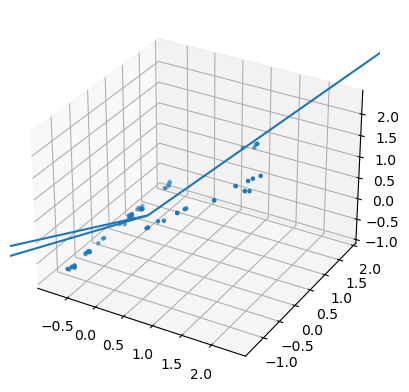

In [1400]:
# EIGEN VALUES/VECTOR
from numpy import linalg as LA
# w, v1 = LA.eig(cov)
w, v1 = LA.eig(np.cov(X.T))
print("\nCOV EIGENVALUES:",w)
print("COV EIGENVECTORS (across rows):")
print(v1.T)

# X = np.random.multivariate_normal(u, cov, NPOINTS)

# PCA CALCULATION
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
pca.fit(X)
print('\nPCA')
print(pca.components_)
v2=pca.components_

# print(v1/v2)

# PLOT
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(X[:,0],X[:,1],X[:,2],marker=".", cmap="viridis")
v1=v1*1000
# v2=v2*1000

ax.quiver(0,0,0,v1[0,0],v1[1,0],v1[2,0])
ax.quiver(0,0,0,v1[0,1],v1[1,1],v1[2,1])
ax.quiver(0,0,0,v1[0,2],v1[1,2],v1[2,2])

# ax.quiver(0,0,0,v2[0,0],v2[1,0],v2[2,0])
# ax.quiver(0,0,0,v2[0,1],v2[1,1],v2[2,1])
# ax.quiver(0,0,0,v2[0,2],v2[1,2],v2[2,2])
plt.show()

In [1401]:
# Only taking the top 3 eigenvalues and their corresponding eigenvectors for comparison
top_eigenvalues = w[:5]
top_eigenvectors = v1[:, :5]

# Creating a DataFrame to show the top 3 principal components and their explained variance
pca_results = pd.DataFrame({
    'Eigenvalue': top_eigenvalues,
    'Explained Variance Ratio': pca.explained_variance_ratio_,
    'Cumulative Explained Variance': np.cumsum(pca.explained_variance_ratio_)
})

pca_results

,Eigenvalue,Explained Variance Ratio,Cumulative Explained Variance
0,4.311723,0.387075,0.387075
1,2.363255,0.212156,0.599231
2,1.326911,0.119120,0.718351
3,0.000077,0.081513,0.799864
4,0.007928,0.072303,0.872167


The matching results from the manual calculation and the scikit-learn PCA show that the method works correctly. The scatter plot with the main lines drawn on it helps us see and understand how the data is arranged and how PCA changes it to a different form.

## Apply PCA with all components to examine the explained variance ratio

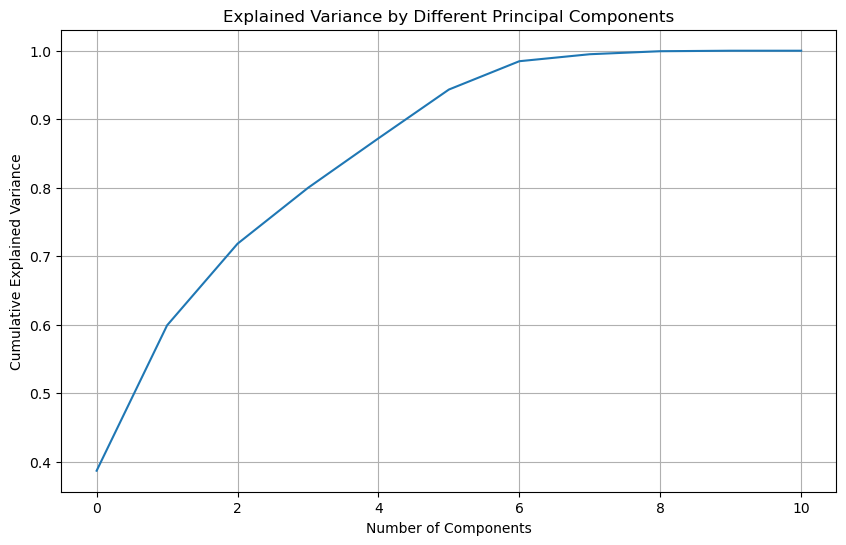

array([0.38707514, 0.59923097, 0.71835139, 0.79986401, 0.87216735,
       0.94335944, 0.98469969, 0.99488691, 0.99928137, 0.9999931 ,
       1.        ])

In [1402]:
# Apply PCA with all components to examine the explained variance ratio
pca = PCA()
pca.fit_transform(X)

# Explained variance ratio
explained_variance = pca.explained_variance_ratio_

# Plotting the cumulative explained variance to determine the optimal number of components
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Different Principal Components')
plt.grid(True)
plt.show()

# Returning the cumulative explained variance for interpretation
explained_variance.cumsum()


The curve suggests that around 90% of the variance is explained by the first 4 principal components, as the curve starts to level off beyond this point.

## PCA - Reduced Dimensional Data Visualization

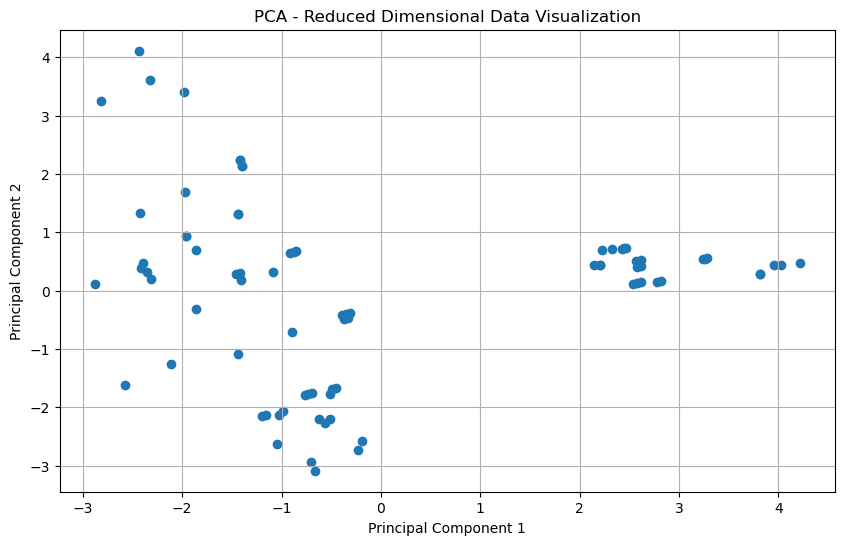

In [1403]:
# Applying PCA with the optimal number of components (2 components for visualization)
pca_optimal = PCA(n_components=2)
reduced_data = pca_optimal.fit_transform(X)

# Visualizing the reduced-dimensional data
plt.figure(figsize=(10, 6))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA - Reduced Dimensional Data Visualization')
plt.grid(True)
plt.show()


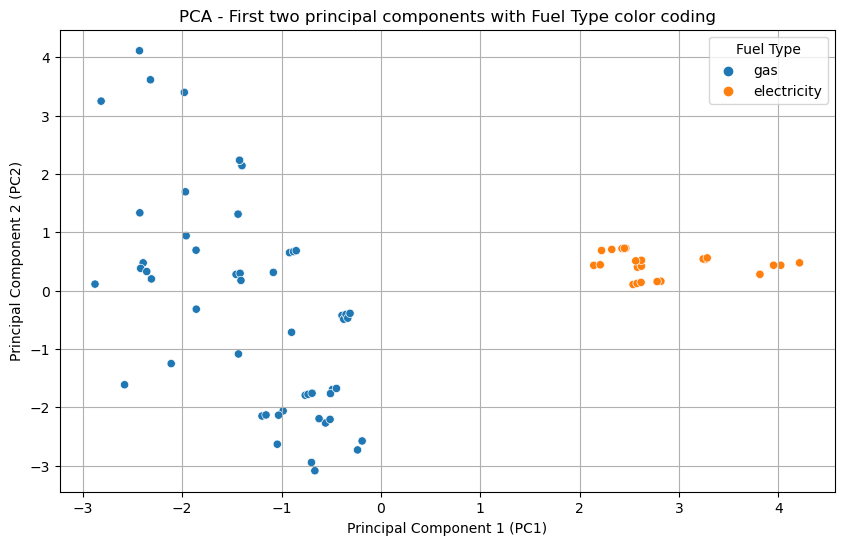

In [1404]:
fuel_type_labels = y['fuel_type'].map({0: 'electricity', 1: 'gas'}) 

# Add the fuel type labels to the DataFrame
pca_df['fuel_type'] = fuel_type_labels

# use seaborn to plot the scatter plot with hues
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='fuel_type', palette='tab10')
plt.title('PCA - First two principal components with Fuel Type color coding')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.legend(title='Fuel Type')
plt.grid(True)
plt.show()


## Analysis and Interpretation of PCA Results

Analyzing the first graph, which shows the cumulative explained variance, the curve starts to plateau after the fourth component. By the fifth component, the cumulative explained variance is close to 90%. Therefore, retaining four or five components would be optimal for balancing data dimensionality reduction and information retention.

The first two principal components capture the majority of the variance in the data, as seen in the scatter plot without color coding. This indicates that most of the information can be compressed into two dimensions. When the fuel type is used as a hue in the scatter plot, there is a visible separation between electric and gas vehicles along the principal components, suggesting that PCA has managed to reduce the dimensions while still retaining the characteristics that can distinguish between the two fuel types.

In conclusion, for this dataset, retaining four or five components principal components is optimal for analysis, allowing most of the variance to be explained while significantly reducing the number of dimensions (almost by half). The visualizations indicate that these components are meaningful as they help in distinguishing between electric and gas vehicles.

# Dimensionality Reduction with t-SNE

Implemention of t-SNE on the same dataset.
Exploration of different perplexity values and their impact.
Visualizion of the t-SNE output to reveal patterns and clusters.
Comparison of t-SNE results with PCA results.

## Perplexity Value = 30

(80, 11)
RESULTS
shape :  (80, 2)
First few points : 
 [[ 1.2051195 -3.1006622]
 [ 1.4165833 -2.87457  ]]


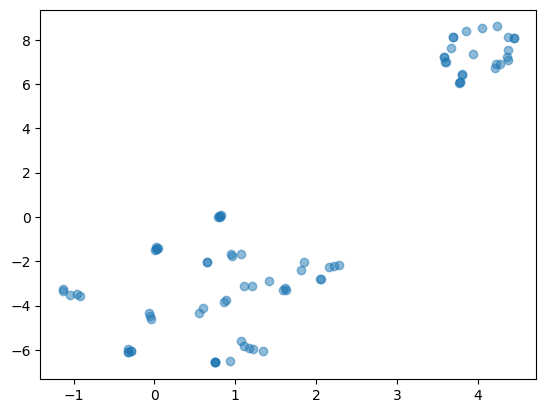

In [1405]:
# LOAD DATA

X = record_data.drop('fuel_type', axis=1)
print(X.shape)

# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=30).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)

## Perplexity Value = 16

(80, 11)
RESULTS
shape :  (80, 2)
First few points : 
 [[-5.9813023  4.654429 ]
 [-5.8530436  5.1955423]]


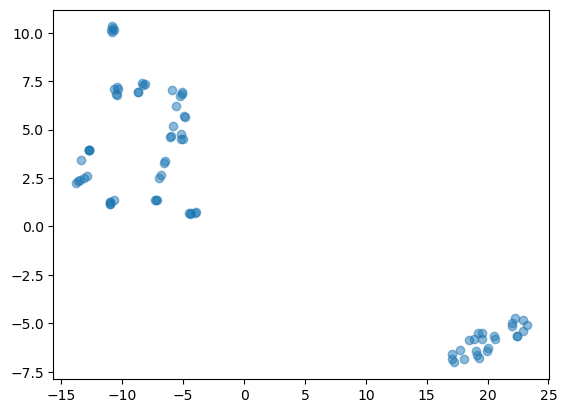

In [1406]:
### Perplexity Value = 16

# LOAD DATA
X = record_data.drop('fuel_type', axis=1)
print(X.shape)

# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=16).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)

## Perplexity Value = 1

(80, 11)
RESULTS
shape :  (80, 2)
First few points : 
 [[-48.516888 -15.93984 ]
 [-52.88673  -22.104866]]


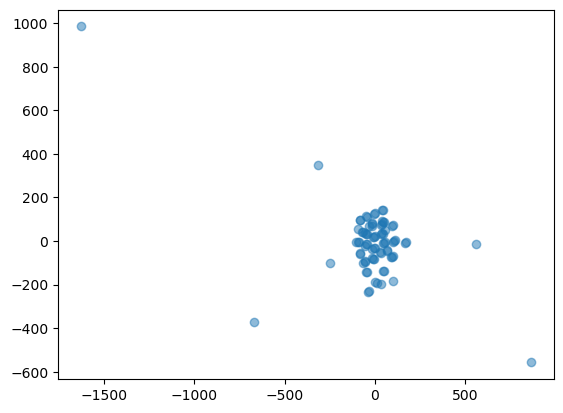

In [1407]:
### Perplexity Value = 1

# LOAD DATA

X = record_data.drop('fuel_type', axis=1)
print(X.shape)

# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=2, learning_rate='auto',init='random', perplexity=1).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)

Analysis and Interpretation of t-SNE Results

With a perplexity value of 30, the t-SNE algorithm has successfully reduced the dimensionality of the data and the resulting plot shows the data in two dimensions. Based on the plots, we can infer that the dataset has some intrinsic clusters or groupings, which could be further analyzed for patterns or similarities. A lower perplexity of 16 means the model pays more attention to local structure, which can result in tighter clusters that may reveal more local groupings or subclusters within the data. Here, the clusters appear more compact and less dispersed, reflecting a focus on local similarities. For the perplexity level of 1, the t-SNE algorithm is primarily focusing on the local relationships between very close neighbors, which can lead to a more fragmented distribution of points with many small clusters that may not accurately reflect the overall structure of the data. The resulting visualization is much more scattered and less cohesive than those with higher perplexity values, making it difficult to derive any insight from the data.

Overall, t-SNE efficiently reduced the dimensions from 11 to 2. We can see clear groupings have formed with the perplexity values of 16 and 30. 

## Evaluation and Comparison

Evaluation of the effectiveness of PCA and t-SNE in terms of preserving data structure and information, comparison of the visualization capabilities of PCA and t-SNE. and the trade-offs and scenarios where one technique may outperform the other:

| Aspect                        | PCA                                                          | t-SNE                                                       |
|-------------------------------|--------------------------------------------------------------|-------------------------------------------------------------|
| **Preservation of Structure and Information** | Preserves global structure and variance.                     | Preserves local structure and relationships.                |
| **Visualization**             | Clear, interpretable axes representing transformed features. | Complex, with no interpretable axes and coordinates. |
| **Computation**               | Fast and deterministic.                                      | Slow and stochastic.                                        |
| **Use Case**                  | Suitable for large datasets and initial analysis.            | Suitable for detailed exploration on smaller datasets.       |
| **Effectiveness**             | Best for datasets with linear relationships.                 | Best for datasets with non-linear relationships.            |
| **Interpretability**          | Components directly relate to original features.             | Components have no direct relationship to features.         |
| **Scenarios**                 | Used for dimensionality reduction and feature extraction.    | Used for clustering and data visualization.                 |
| **Trade-offs**                | Poor at capturing non-linear relationships, therefore the approach  might oversimplify. | May not preserve global structure and is sensitive to hyperparameters. |


References Used: <br>
- https://towardsdatascience.com/principal-component-analysis-for-dimensionality-reduction-115a3d157bad <br>
- https://www.datacamp.com/tutorial/introduction-t-sne <br>
- https://towardsdatascience.com/how-t-sne-outperforms-pca-in-dimensionality-reduction-7a3975e8cbdb <br>
- https://www.geeksforgeeks.org/difference-between-pca-vs-t-sne/ 
